In [1]:
import os

os.chdir("../..")  # need to set path to repo root

In [2]:
from src.dataset import get_segmentation_df

segmentation_df = get_segmentation_df()
segmentation_df.head()
# can be multiple annotations per image, each one represents an individual card and its bounding box

,annotation_id,file_name,height,id,width,x0,x1,y0,y1,file_path
0,0,4125906001_1,837,0,500,50,450,225,795,db/shared/jpg/segmentation/front_scans/4125906...
1,0,0_4186041001,825,1,500,50,450,222,783,db/shared/jpg/segmentation/front_scans/0_41860...
2,0,4125505001_1,798,2,500,50,450,215,758,db/shared/jpg/segmentation/front_scans/4125505...
3,0,4125762001_1,803,3,500,50,450,216,762,db/shared/jpg/segmentation/front_scans/4125762...
4,0,0_4185750001,825,4,500,50,450,222,783,db/shared/jpg/segmentation/front_scans/0_41857...


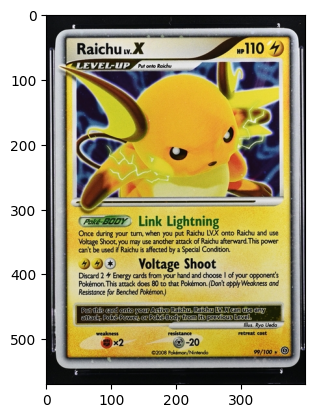

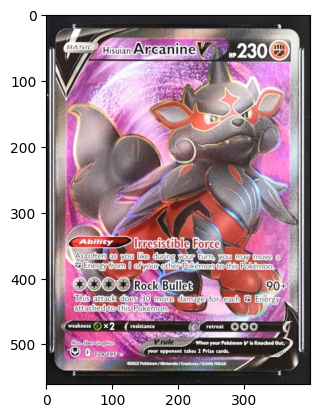

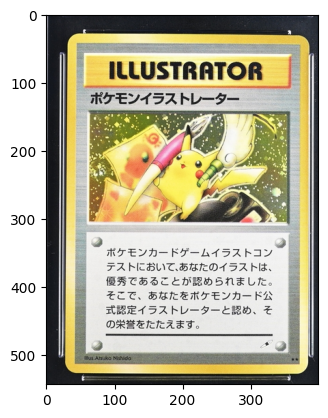

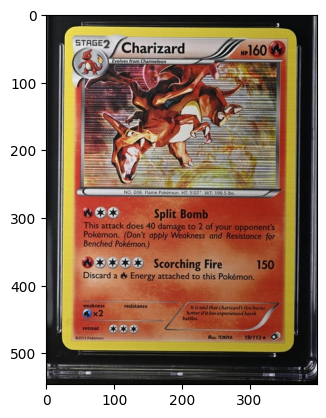

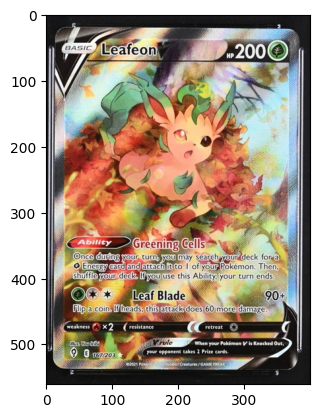

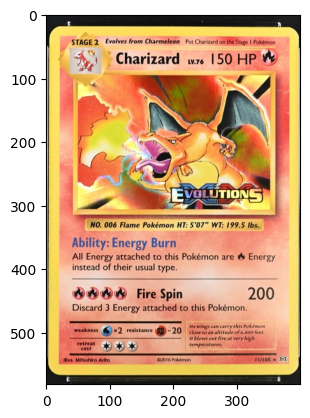

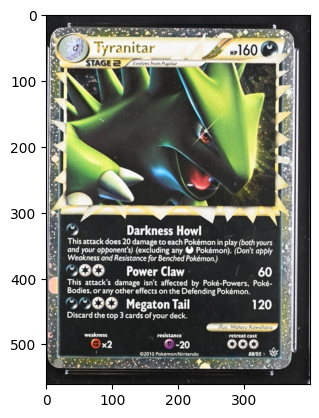

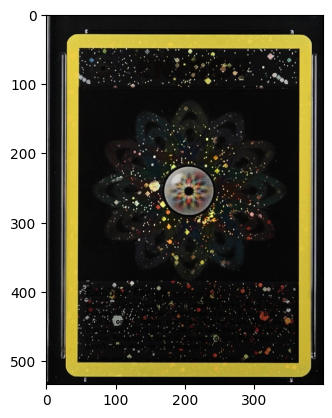

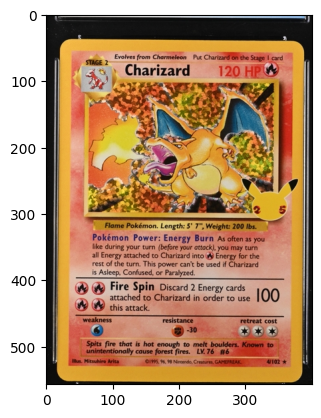

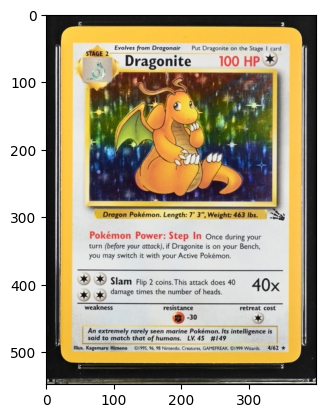

In [8]:
from src.shared.image import display_image, crop_image_px
from src.shared.storage import Database, ImageStorage
import time

# disk storage wrapper for shared nested repository, acts as a "bucket"
front_scans_storage = ImageStorage("segmentation/front_scans", db=Database.SHARED)

# grab 0th annotation and display it
for i in range(10):
    annotation_0 = segmentation_df.iloc[i]
    img = front_scans_storage.get(annotation_0["file_name"])
    # display_image(img)

    cropped_img = crop_image_px(
        img,
        top=annotation_0["y0"],
        bottom=annotation_0["y1"],
        left=annotation_0["x0"],
        right=annotation_0["x1"],
    )
    display_image(cropped_img)
    time.sleep(1)

In [9]:
other_scans_storage = ImageStorage("segmentation/other_scans", db=Database.SHARED)
other_scans_storage.size()

28